DBSCAN (Core)
Descripción:

En esta actividad, implementarás el algoritmo DBSCAN para detectar patrones de agrupamiento y encontrar clientes atípicos en el dataset «Wholesale Customers Data» disponible en Kaggle. DBSCAN es ideal para detectar clusters de forma arbitraria y encontrar puntos atípicos (outliers), lo que es útil en escenarios donde los datos no forman clusters esféricos como en el caso de K-means.

# 1. Carga de datos:
* Descarga y carga el dataset de Kaggle. Realiza una exploración inicial del dataset, identificando las variables que   – consideras importantes para el agrupamiento.
* El dataset contiene información sobre diferentes tipos de clientes y su comportamiento de compra, lo que incluye variables como el gasto anual en distintas categorías de productos.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import silhouette_score

In [4]:
data = pd.read_csv('../data/Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


# 2. Exploración y preprocesamiento de datos:

##  Realiza un análisis exploratorio de los datos
* Incluyendo un resumen estadístico de las variables. Es importante entender la distribución de los datos antes de aplicar el modelo de DBSCAN.

In [5]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


## Asegúrate de estandarizar los datos antes de ejecutar DBSCAN

In [12]:
X = data[['Fresh','Frozen', 'Detergents_Paper', 'Delicassen', 'Milk', 'Grocery']]
ms=MinMaxScaler()
X = ms.fit_transform(X)

# 3. Aplicación de DBSCAN:

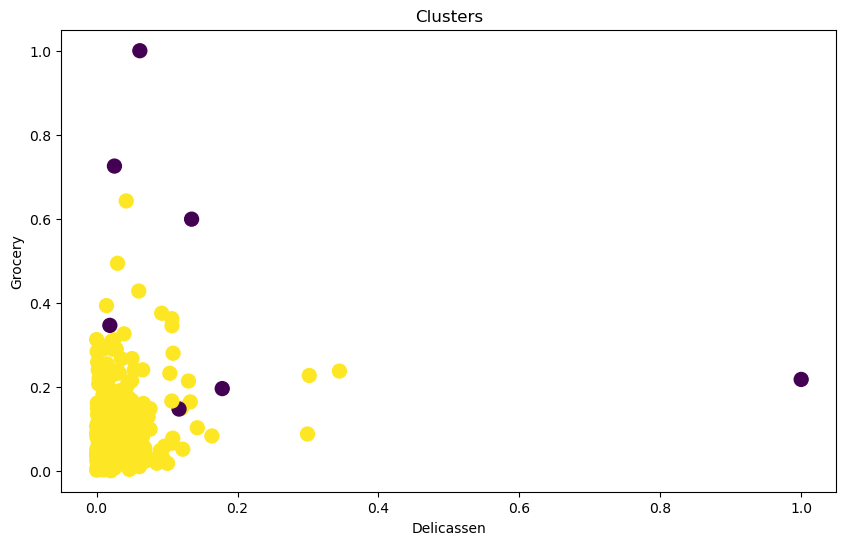

In [17]:
# Aplicamos DBSCAN
model=DBSCAN(eps=0.5,min_samples=40)
model.fit(X)

y_pred=model.fit_predict(X)

# Visualizamos los clusters de delicassen y grocery
plt.figure(figsize=(10,6))
plt.scatter(X[:,3],X[:,5],c=y_pred,s=100,cmap='viridis')
plt.title('Clusters')
plt.xlabel('Delicassen')
plt.ylabel('Grocery')
plt.show()

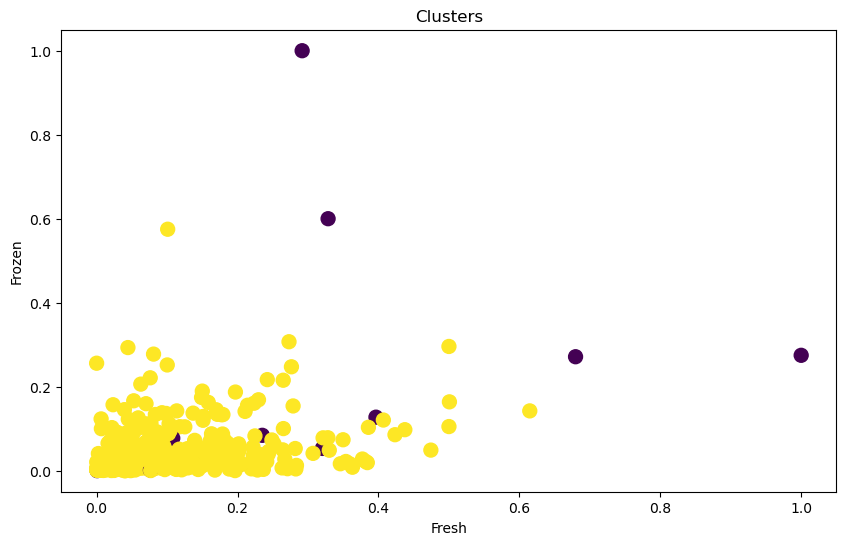

In [ ]:
model=DBSCAN(eps=0.3,min_samples=100)
model.fit(X)

y_pred=model.fit_predict(X)

# Visualizamos los clusters de Fresh y Frozen
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y_pred,s=100,cmap='viridis')
plt.title('Clusters')
plt.xlabel('Fresh')
plt.ylabel('Frozen')
plt.show()

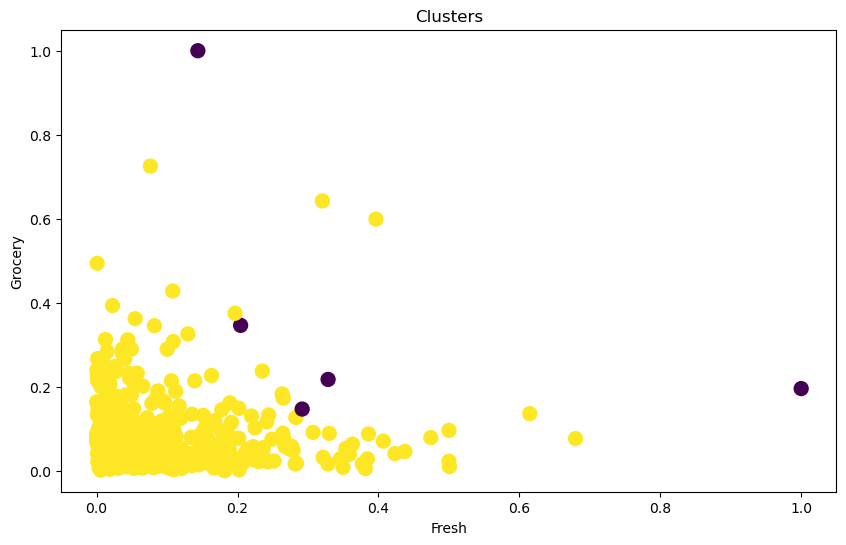

In [27]:
model=DBSCAN(eps=0.5,min_samples=5)
model.fit(X)

y_pred=model.fit_predict(X)

# Visualizamos los clusters de Fresh y Grocery
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,5],c=y_pred,s=100,cmap='viridis')
plt.title('Clusters')
plt.xlabel('Fresh')
plt.ylabel('Grocery')
plt.show()

# Interpretación de resultados:

Los clusters de DBScan basados en densidad son muy buenos para reconocer valores atipicos o outliers y lo demostro en los graficos en donde se utilizo todas las variables combinadas de a 2 para mejor visualizacion